In [ ]:
import pandas as pd
df = pd.read_csv('/Users/kai/Desktop/qs/data_csv_distinct_0606/000001.SZ.csv')[['TRADE_DT', 'S_DQ_CLOSE']]
df['TRADE_DT'] = pd.to_datetime(df['TRADE_DT'], format='%Y%m%d')

In [ ]:
df['shift_date'] = df['TRADE_DT'].shift()
display(df)
df.dropna(subset=['shift_date'], inplace=True)
df

In [ ]:
import time 
start1 = time.time()
for i in range(10000):
    df_cross = pd.DataFrame()
    df_cross=df[(df['golden_cross']==1)|(df['death_cross']==1)]
end1 = time.time()
print(end1-start1)
start2 = time.time()
for i in range(10000):
    df_cross = pd.DataFrame()
    df_cross=df[(df['golden_cross']==1)|(df['death_cross']==1)].copy()
end2 = time.time()
print(end2-start2)

In [ ]:
import high_low_xuejie_zuhui as hl
import pandas as pd
filename = '000001.SZ.csv'
df = hl.df_init(filename)
a = hl.find_high_low(df, filename=filename, save_data = False, draw_n_days=200, draw=True)

In [ ]:
df1 = df.head(5)
df2 = df1[df1['TRADE_DT'] > '2000-01-05']
print(df2.iloc[1,-1])
df2.iat[1,-1] = 9
print(df2.iloc[1,-1])
display(df1)
display(df2)

In [ ]:
import sys
import talib
for i in sys.path:
    print(i)

In [ ]:
def find_high_low_xuemei(df):
    '''
    Output:
    ------------
    (high_points, low_points)\n
    high_points = [{'high_date': '2019-01-01', 'high_price': 10.0}, ...]\n
    low_points = [{'low_date': '2019-01-01', 'low_price': 10.0}, ...]

    Example:
    ------------
    >>> df = pd.read_csv('000001.SZ.csv')
    >>> df['TRADE_DT'] = pd.to_datetime(df['TRADE_DT'], format='%Y%m%d')
    >>> df = df[['TRADE_DT', 'S_DQ_CLOSE']]
    >>> high_points, low_points = find_high_low(df)
    '''
    # 找出MACD
    macd, macd_signal, _ = talib.MACD(df['S_DQ_CLOSE'].values)
    df['macd'] = macd
    df['macd_signal'] = macd_signal

    # 找出金叉和死叉
    df['golden_cross'] = ((df['macd'] > df['macd_signal']) & (
        df['macd'].shift() < df['macd_signal'].shift())).astype(int)
    df['death_cross'] = ((df['macd'] < df['macd_signal']) & (
        df['macd'].shift() > df['macd_signal'].shift())).astype(int)

    # 选出金叉和死叉
    # * df_cross保存了金叉、死叉，shift_date是下一个x的日期
    df_cross = df[(df['golden_cross'] == 1) | (df['death_cross'] == 1)].copy()
    df_cross['shift_date'] = df_cross['TRADE_DT'].shift(-1)
    df_cross = df_cross.dropna(subset=['shift_date'])
    df_high_points = pd.DataFrame()
    df_low_points = pd.DataFrame()
    for index, row in df_cross.iterrows():
        # df3保存了两个x之间的df
        df_current_window = df[(df['TRADE_DT'] >= row['TRADE_DT']) & (
            df['TRADE_DT'] <= row['shift_date'])]
        if df_current_window.iloc[0]['golden_cross'] == 1:
            # * 金叉->死叉，之间是高点
            df_temp = df_current_window[df_current_window['S_DQ_CLOSE'].values ==
                                        df_current_window['S_DQ_CLOSE'].max()]
            df_temp = df_temp.head(1)
            df_high_points = pd.concat([df_high_points, df_temp])
        elif df_current_window.iloc[0]['death_cross'] == 1:
            # * 死叉->金叉，之间是低点
            df_temp = df_current_window[df_current_window['S_DQ_CLOSE'].values ==
                                        df_current_window['S_DQ_CLOSE'].min()]
            df_temp = df_temp.head(1)
            df_low_points = pd.concat([df_low_points, df_temp])

    # 初始化一个列表：high_points，其中每个元素是一个字典，包含两个键值对：high_date和high_price
    high_points = []
    for index, row in df_high_points.iterrows():
        high_points.append(
            {'high_date': row['TRADE_DT'], 'high_price': row['S_DQ_CLOSE']})
    # 初始化一个列表：low_points，其中每个元素是一个字典，包含两个键值对：low_date和low_price
    low_points = []
    for index, row in df_low_points.iterrows():
        low_points.append(
            {'low_date': row['TRADE_DT'], 'low_price': row['S_DQ_CLOSE']})

    return (high_points, low_points)


In [1]:
import horizontal_area as ha
import high_low_xuejie_zuhui as hl

Current file path is /Users/kai/Desktop/qs/data_csv_distinct_0606/000002.SZ.csv


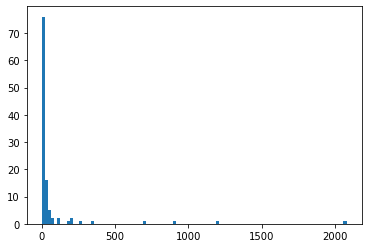

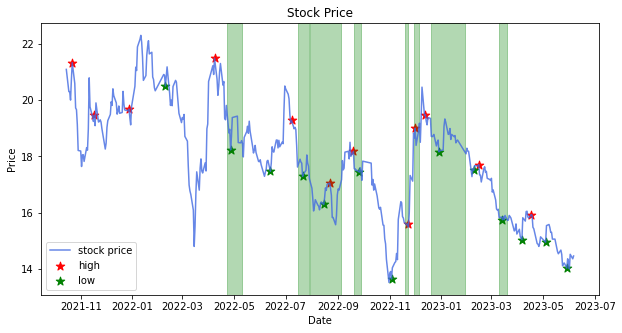

(111, 7912.0)

In [2]:
filename = '000002.SZ.csv'
df = hl.df_init(filename)
_, _, high_points, low_points = hl.find_high_low_old(df, filename=filename, save_data = False, draw_n_days=200, draw=False)
result = ha.find_ha_near_hl(df, high_points, low_points)
ha.draw_horizontal_area(df, result, high_points, low_points, filename, n_days=400, print_result=False, show_plot=True, save_plot=False)

Current file path is /Users/kai/Desktop/qs/data_csv_distinct_0606/000001.SZ.csv


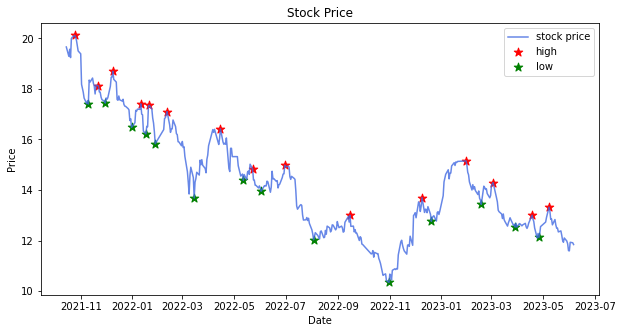

当前参数组合: max_len_of_window = 40, min_len_of_window = 5, gamma = 0.4


100%|██████████| 5676/5676 [00:20<00:00, 279.67it/s]


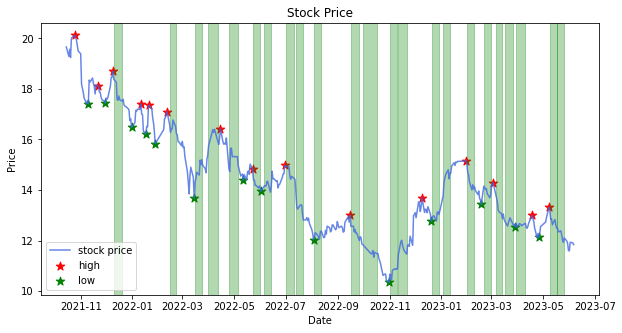

(330, 3023)

In [8]:
filename = '000001.SZ.csv'
df = hl.df_init(filename)
high_points, low_points = hl.find_high_low(df, filename=filename, save_data = False, draw_n_days=400, draw=True)
result = ha.find_horizontal_area(df, high_points, low_points, 40, 5)
ha.draw_horizontal_area(df, result, high_points, low_points, filename, n_days=400, print_result=False, show_plot=True, save_plot=False)

In [23]:
import pandas as pd
# initialize a dataframe with 2cols and 3 rows
df = pd.DataFrame(columns=['TRADE_DT', 'S_DQ_CLOSE'], data=[[1,2],[3,4],[5,6]], index=[1,2,3])
df

,TRADE_DT,S_DQ_CLOSE
1,1,2
2,3,4
3,5,6


In [26]:
df.iloc[1]

TRADE_DT      3
S_DQ_CLOSE    4
Name: 2, dtype: int64